# Neural network development for turbulence modeling in URANS simulations of non-Newtonian media slope flows

URANS mathematical model:
\begin{equation}
	\label{vof}
	\left\{
		\begin{aligned}
			&\boldsymbol{\nabla} \cdot \bar{\boldsymbol{u}} = 0,\\
			&\frac{\partial \alpha}{\partial t} + \boldsymbol{\nabla} \cdot (\bar{\boldsymbol{u}} \alpha) = 0,\\
			&\frac{\partial (\rho \bar{\boldsymbol{u}})}{\partial t} + \boldsymbol{\nabla} \cdot (\rho \bar{\boldsymbol{u}} \bar{\boldsymbol{u}}) = -\boldsymbol{\nabla} \bar{p} + \boldsymbol{\nabla} \cdot \bar{\boldsymbol{\tau}} + \rho \bar{\boldsymbol{f}}.
		\end{aligned}
	\right.
\end{equation}
Here $\bar{\boldsymbol{u}}$ is the speed of the mixture, horizontal bar means Reynolds averaging, $\alpha$ is the volume fraction of the selected phase, $\bar{\boldsymbol{\tau}} = \bar{\boldsymbol{\tau}}_{Re} + \bar{\boldsymbol{\tau}}_m$ is the stress tensor calculated as sum of Reynolds stress tensor and viscous stress tensor, $\bar{\boldsymbol{\tau}}_m = 2 \mu \bar{\boldsymbol{s}}$ is the viscous stress tensor, which is a function of the strain rate tensor $\bar{\boldsymbol{s}} = 0.5 \left[ \boldsymbol{\nabla} \bar{\boldsymbol{u}} + (\boldsymbol{\nabla} \bar{\boldsymbol{u}})^T\right]$, $\mu = \nu \rho$ is dynamic viscosityof a mixture which is calculated as a product of density and kinematic viscosity of mixture, $\nu = \nu_1 \alpha + \nu_0 (1 -\alpha)$ is the kinemsatic viscosity of mixture calculated according to the principle of the weighted average, $\nu_0$ is a constant, $\nu_1 = min (\nu_*, (\tau_* + K \dot{\gamma}^n) / \dot{\gamma})$ is Herschel-Bulkley reology ratio, $\rho = \rho_1 \alpha + \rho_0 (1 - \alpha)$ is the mixture density, $\rho_0$ and $\rho_1$ are constants, $\bar{p}$ is the pressure, $\bar{\boldsymbol{f}}$ is the density of the body forces.

The $\bar{\boldsymbol{\tau}}_{Re}$ Reynolds stress tensor is calculetaed using Tensor Basis Neural Network (TBNN) according to the principle presented in the work of Pope [1]. It is presented as function of strain rate $\bar{\boldsymbol{s}} = 0.5 \left[ \boldsymbol{\nabla} \bar{\boldsymbol{u}} + (\boldsymbol{\nabla} \bar{\boldsymbol{u}})^T\right]$ and rotation rate $\bar{\boldsymbol{r}} = 0.5 \left[ \boldsymbol{\nabla} \bar{\boldsymbol{u}} - (\boldsymbol{\nabla} \bar{\boldsymbol{u}})^T\right]$ tensors, and 10 their isotropic combinations $T^i$ and 5 invariants $\lambda_i$. Calculations performed for normalized tensors $\bar{\tau}_{Re}'$, $\bar{\boldsymbol{s}}'$, $\bar{\boldsymbol{r}}'$. The scaling parameters $U_0$, $h_0$, $\rho$ used for normalization:

\begin{equation}
	\label{norm}
	\left\{
		\begin{aligned}
			&\bar{\boldsymbol{\tau}}_{Re} = \bar{\boldsymbol{\tau}}_{Re}' \rho U_0 h_0,\\
			&\bar{\boldsymbol{s}} = \bar{\boldsymbol{s}}' U_0^2 / h_0,\\
			&\bar{\boldsymbol{r}} = \bar{\boldsymbol{r}}' U_0^2 / h_0.
		\end{aligned}
	\right.
\end{equation}

In what follows, we omit the apostrophe symbol and keep in mind that we are considering normalized tensors.

Normalized Reynolds stress tensor is

\begin{equation}
	\label{MLReynolds}
	\bar{\boldsymbol{\tau}}_{Re} = \sum\limits_{n=1}^{10} g^{(n)} (\lambda_1, ... , \lambda_5) \boldsymbol{T}^{(n)}.
\end{equation}

\begin{equation}
	\begin{aligned}
		&\boldsymbol{T}^{(1)} = \bar{\boldsymbol{s}},
		&&\boldsymbol{T}^{(6)} = \bar{\boldsymbol{r}}^2 \bar{\boldsymbol{s}} + \bar{\boldsymbol{s}} \bar{\boldsymbol{r}}^2 - \frac{2}{3}\boldsymbol{I} \cdot Tr(\bar{\boldsymbol{s}} \bar{\boldsymbol{r}}^2),\\
		&\boldsymbol{T}^{(2)} = \bar{\boldsymbol{s}} \bar{\boldsymbol{r}} - \bar{\boldsymbol{r}} \bar{\boldsymbol{s}},
		&&\boldsymbol{T}^{(7)} = \bar{\boldsymbol{r}} \bar{\boldsymbol{s}} \bar{\boldsymbol{r}}^2 - \bar{\boldsymbol{r}}^2 \bar{\boldsymbol{s}} \bar{\boldsymbol{r}},\\
		&\boldsymbol{T}^{(3)} = \bar{\boldsymbol{s}}^2 - \frac{1}{3} \boldsymbol{I} \cdot Tr(\bar{\boldsymbol{s}}^2),
		&&\boldsymbol{T}^{(8)} = \bar{\boldsymbol{s}} \bar{\boldsymbol{r}} \bar{\boldsymbol{s}}^2 - \bar{\boldsymbol{s}}^2 \bar{\boldsymbol{r}} \bar{\boldsymbol{s}},\\
		&\boldsymbol{T}^{(4)} = \bar{\boldsymbol{r}}^2 - \frac{1}{3}\boldsymbol{I} \cdot Tr(\bar{\boldsymbol{r}}^2),
		&&\boldsymbol{T}^{(9)} = \bar{\boldsymbol{r}}^2 \bar{\boldsymbol{s}}^2 + \bar{\boldsymbol{s}}^2 \bar{\boldsymbol{r}}^2 - \frac{2}{3} \boldsymbol{I} \cdot Tr(\bar{\boldsymbol{s}}^2 \bar{\boldsymbol{r}}^2),\\
		&\boldsymbol{T}^{(5)} = \bar{\boldsymbol{r}} \bar{\boldsymbol{s}}^2 - \bar{\boldsymbol{s}}^2 \bar{\boldsymbol{r}},
		&&\boldsymbol{T}^{(10)} = \bar{\boldsymbol{r}} \bar{\boldsymbol{s}}^2 \bar{\boldsymbol{r}}^2 - \bar{\boldsymbol{r}}^2 \bar{\boldsymbol{s}}^2 \bar{\boldsymbol{r}},
	\end{aligned}
\end{equation}
\begin{equation}
	\lambda_1 = Tr(\bar{\boldsymbol{s}}^2),\ \ \ \ \lambda_2 = Tr(\bar{\boldsymbol{r}}^2),\ \ \ \ \lambda_3 = Tr(\bar{\boldsymbol{s}}^3),\ \ \ \ \lambda_4 = Tr(\bar{\boldsymbol{r}}^2 \bar{\boldsymbol{s}}),\ \ \ \ \lambda_5 = Tr(\bar{\boldsymbol{r}}^2 \bar{\boldsymbol{s}}^2).
\end{equation}

Calculations performed for turbulent flow in inclined chute with the rectangular cross-section. Scheme of flow is shown in figure below.

<div>
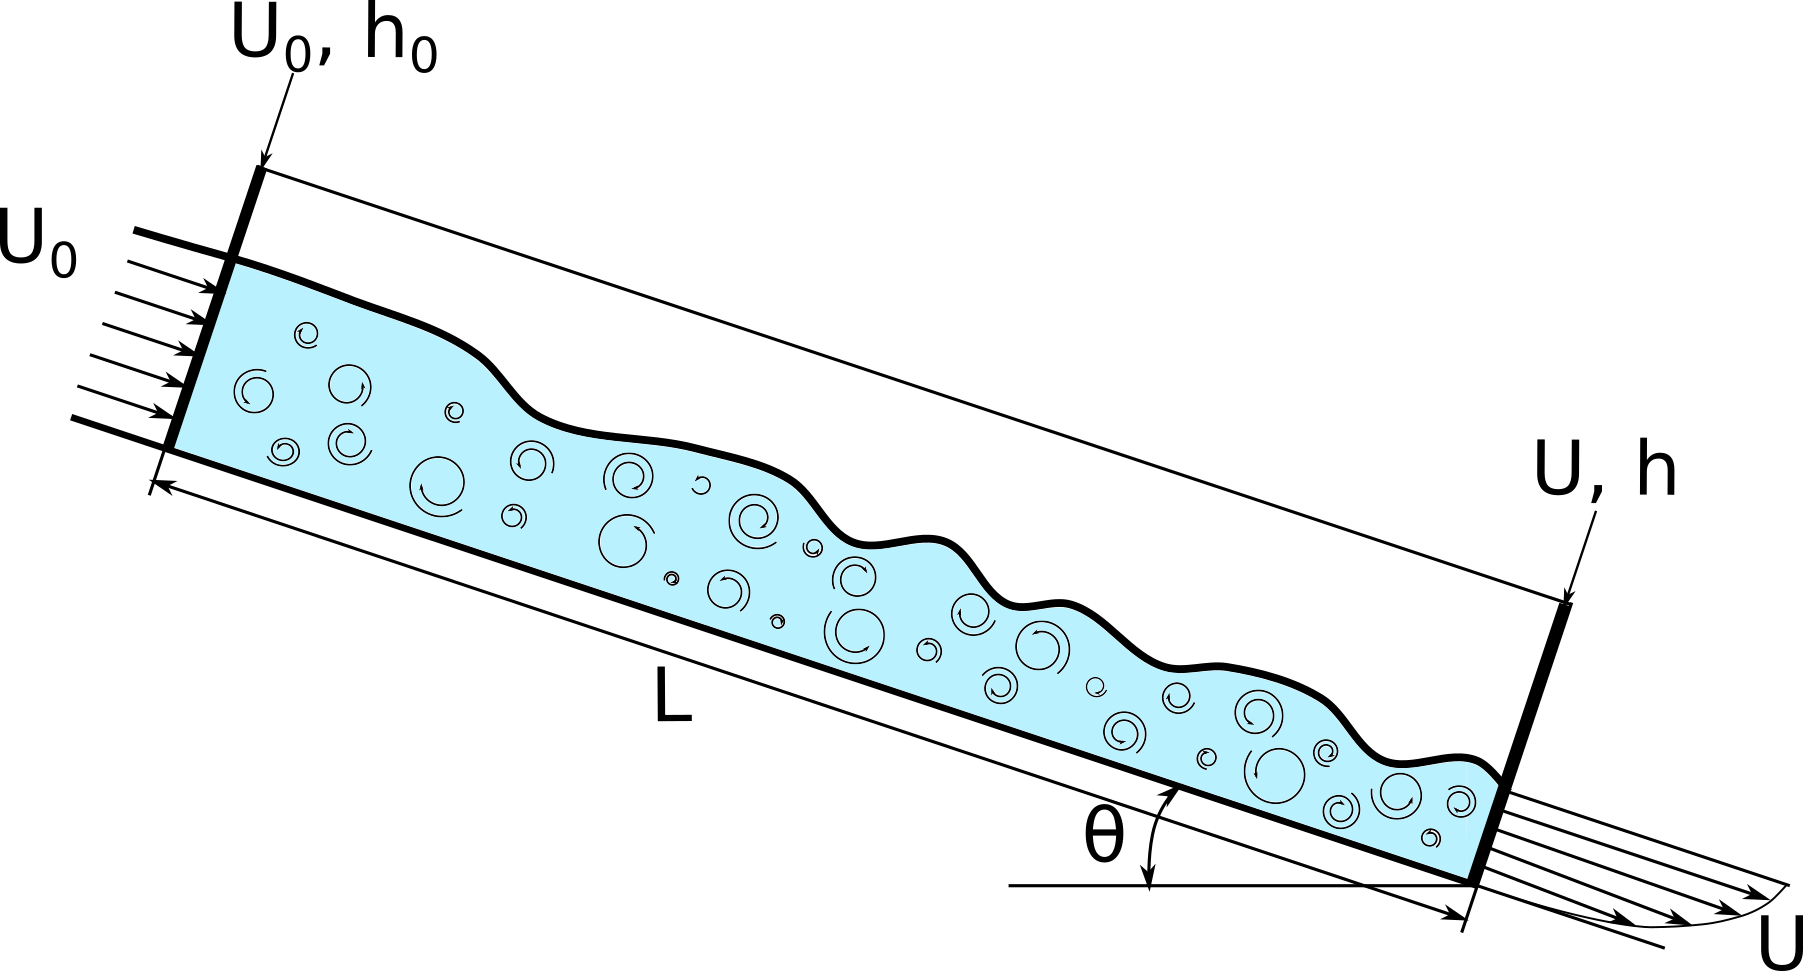
</div>

In the considered flow
\begin{equation}
    U_0 = 0.4\ \text{m}/\text{s},\ \ \ h_0 = 0.01\ \text{m},\ \ \ \theta = 25^\circ,\ \ \ L = 0.1\ \text{m}.
\end{equation}

Reynolds number of flow is 
\begin{equation}
    \text{Re} = U_0 h_0 / \nu_{eff},
\end{equation}

\begin{equation}
    \nu_{eff} = \frac{\tau_* + K (U_0/h_0)^n}{\rho (U_0 / h_0)}.
\end{equation}

Constants in calculation are set as follows:

\begin{equation}
    \nu_* = 10^7\ \text{m}^2/\text{s},\ \ \ \tau_* = 2 \cdot 10^{-3}\ \text{m}^2/\text{s}^2,\ \ \ K = 10^{-4}\ \text{m}^2/\text{s},\ \ \ n = 0.8,\ \ \ \rho = 100\ \text{kg}/\text{m}^3.
\end{equation}

So effective viscosity and Reynolds number are:

\begin{equation}
    \nu_{eff} = 10^{-6}\ \text{m}^2/\text{s},\ \ \ \text{Re} = 4000.
\end{equation}

The mesh cell linear size must be $dx = \frac{h_0}{\text{Re}^{3/4}} = 2 \cdot 10^{-5}$. Time step $dt = 5 \cdot 10^{-5}$.

Mesh size for computational domain size of 0.1x0.011x0.002 m$^3$ is $25 \cdot 10^7$.

[1] S. B. Pope. A more general effective-viscosity hypothesis.Journal of Fluid Mechanics,72(2):331–340, 1975.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [2]:
def timeStepsList():
	timeStepsList = np.loadtxt("timeStepsList.txt", dtype=str)
	index = np.argsort(timeStepsList.astype(np.float))
	timeStepsList = timeStepsList[index]
	return timeStepsList[1:-2]

In [3]:
def readTensor(fileName, folder, time, sz):
	arr = pd.read_csv(folder+time+'/'+time+'/'+fileName[0], header=None, skiprows=23, nrows=sz, dtype=str)
	arr.iloc[:,0] = arr.iloc[:,0].str.replace('[(,)]', '', regex=True)
	arr = arr.iloc[:,0].str.split(expand=True)
	arr.columns = [fileName[0]+'0', fileName[0]+'1', fileName[0]+'2', fileName[0]+'3', fileName[0]+'4',\
                   fileName[0]+'5', fileName[0]+'6', fileName[0]+'7', fileName[0]+'8']
	arr.loc[:,:] = arr.loc[:,:].astype(float)
	return arr
#	return arr[[fileName[0]+'0', fileName[0]+'1', fileName[0]+'2', fileName[0]+'4',\
#                   fileName[0]+'5', fileName[0]+'8']]

In [4]:
def readVector(fileName, folder, time, sz):
	arr = pd.read_csv(folder+time+'/'+time+'/'+fileName[0], header=None, skiprows=23, nrows=sz, dtype=str)
	arr.iloc[:,0] = arr.iloc[:,0].str.replace('[(,)]', '', regex=True)
	arr = arr.iloc[:,0].str.split(expand=True)
	arr.columns = [fileName[0]+'0', fileName[0]+'1', fileName[0]+'2']
	arr.loc[:,:] = arr.loc[:,:].astype(float)
	return arr

In [5]:
def readScalar(fileName, folder, time, sz):
	arr = pd.read_csv(folder+time+'/'+time+'/'+fileName[0], header=None, skiprows=23, nrows=sz, dtype=str)
	arr.columns = [fileName[0]]
	arr.loc[:] = arr.loc[:].astype(float)
	return arr

In [6]:
def formDataset(TSL, folder, FsScalars, FsVectors, FsTensors, size):
	data = pd.DataFrame()
	for time in TSL:
		kwargs = {'folder':folder, 'time':time, 'sz':size}
		scalars = FsScalars.apply(readScalar, axis=1, **kwargs)
		vectors = FsVectors.apply(readVector, axis=1, **kwargs)
		tensors = FsTensors.apply(readTensor, axis=1, **kwargs)
		tmp = pd.concat(list(scalars[:])+list(vectors[:])+list(tensors[:]), axis=1)
		data = data.append(tmp, ignore_index=True)
	return data

In [7]:
TSL = timeStepsList()
lenTSL = len(TSL)
folder = 'TIF'
deltaT = 1e-06
size = 27500
FsScalars = pd.DataFrame([['alpha.water'], ['res/alpha.water'], ['res/p'], ['res/I0'], ['res/I1'],\
                          ['res/I2'], ['res/I3'], ['res/I4']])
FsVectors = pd.DataFrame([['U'], ['res/U'], ['res/Uref']])
FsTensors = pd.DataFrame([['res/T0'], ['res/T1'], ['res/T2'], ['res/T3'], ['res/T4'], ['res/T5'], \
                          ['res/T6'], ['res/T7'], ['res/T8'], ['res/T9']])

In [8]:
trainTSL = TSL[:int(lenTSL/3)]
testTSL = TSL[int(lenTSL/3):]
trainData = formDataset(trainTSL, folder, FsScalars, FsVectors, FsTensors, size)
trainData['dU0'] = trainData['res/U0'] - trainData['U0']
trainData['dU1'] = trainData['res/U1'] - trainData['U1']
trainData['dU2'] = trainData['res/U2'] - trainData['U2']
trainData['dAW'] = trainData['res/alpha.water'] - trainData['alpha.water']
print(trainData.columns)

Index(['alpha.water', 'res/alpha.water', 'res/p', 'res/I0', 'res/I1', 'res/I2',
       'res/I3', 'res/I4', 'U0', 'U1',
       ...
       'res/T93', 'res/T94', 'res/T95', 'res/T96', 'res/T97', 'res/T98', 'dU0',
       'dU1', 'dU2', 'dAW'],
      dtype='object', length=111)


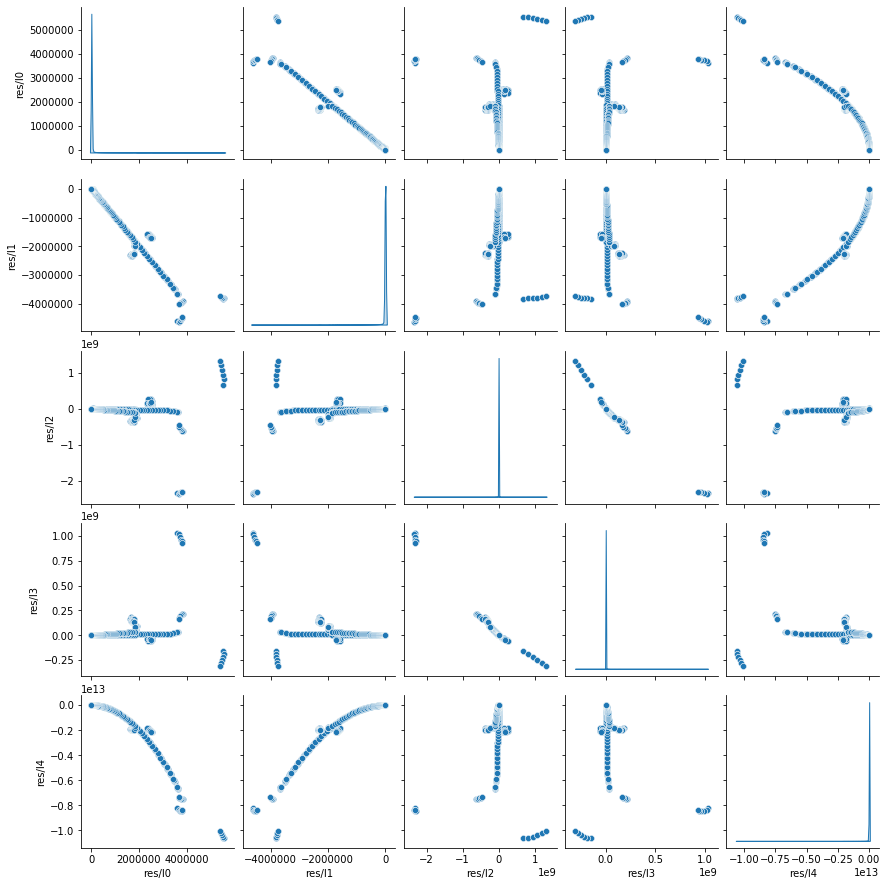

In [9]:
sns.pairplot(trainData[['res/I0', 'res/I1', 'res/I2', 'res/I3', 'res/I4']], diag_kind='kde')

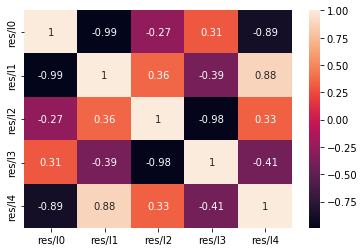

In [10]:
sns.heatmap(trainData[['res/I0', 'res/I1', 'res/I2', 'res/I3', 'res/I4']].corr(), annot = True)

In [11]:
def log10pm(x):
    if x>0:
        return np.log10(x)
    elif x<0:
        return -np.log10(-x)
    else:
        return 0
nplog10pm = np.vectorize(log10pm)

In [12]:
trainData['log_res/I0'] = nplog10pm(trainData['res/I0'])
trainData['log_res/I1'] = nplog10pm(trainData['res/I1'])
trainData['log_res/I2'] = nplog10pm(trainData['res/I2'])
trainData['log_res/I3'] = nplog10pm(trainData['res/I3'])
trainData['log_res/I4'] = nplog10pm(trainData['res/I4'])

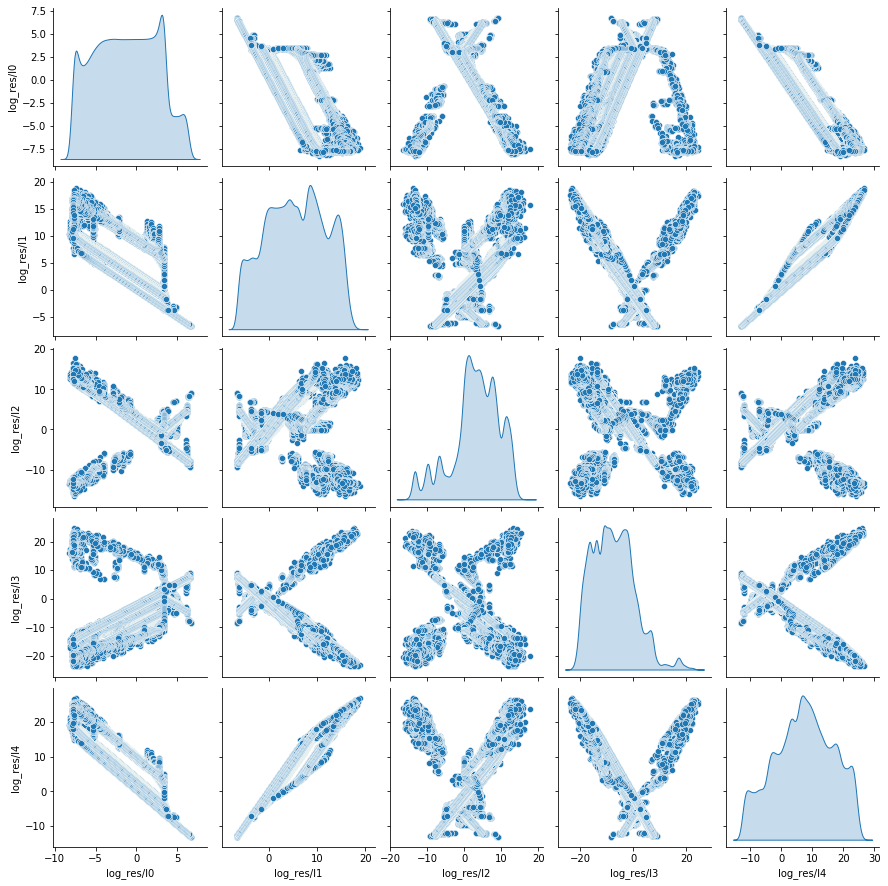

In [13]:
sns.pairplot(trainData[['log_res/I0', 'log_res/I1', 'log_res/I2', 'log_res/I3', 'log_res/I4']], diag_kind='kde')

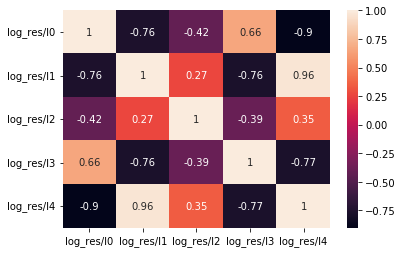

In [14]:
sns.heatmap(trainData[['log_res/I0', 'log_res/I1', 'log_res/I2', 'log_res/I3', 'log_res/I4']].corr(), annot = True)

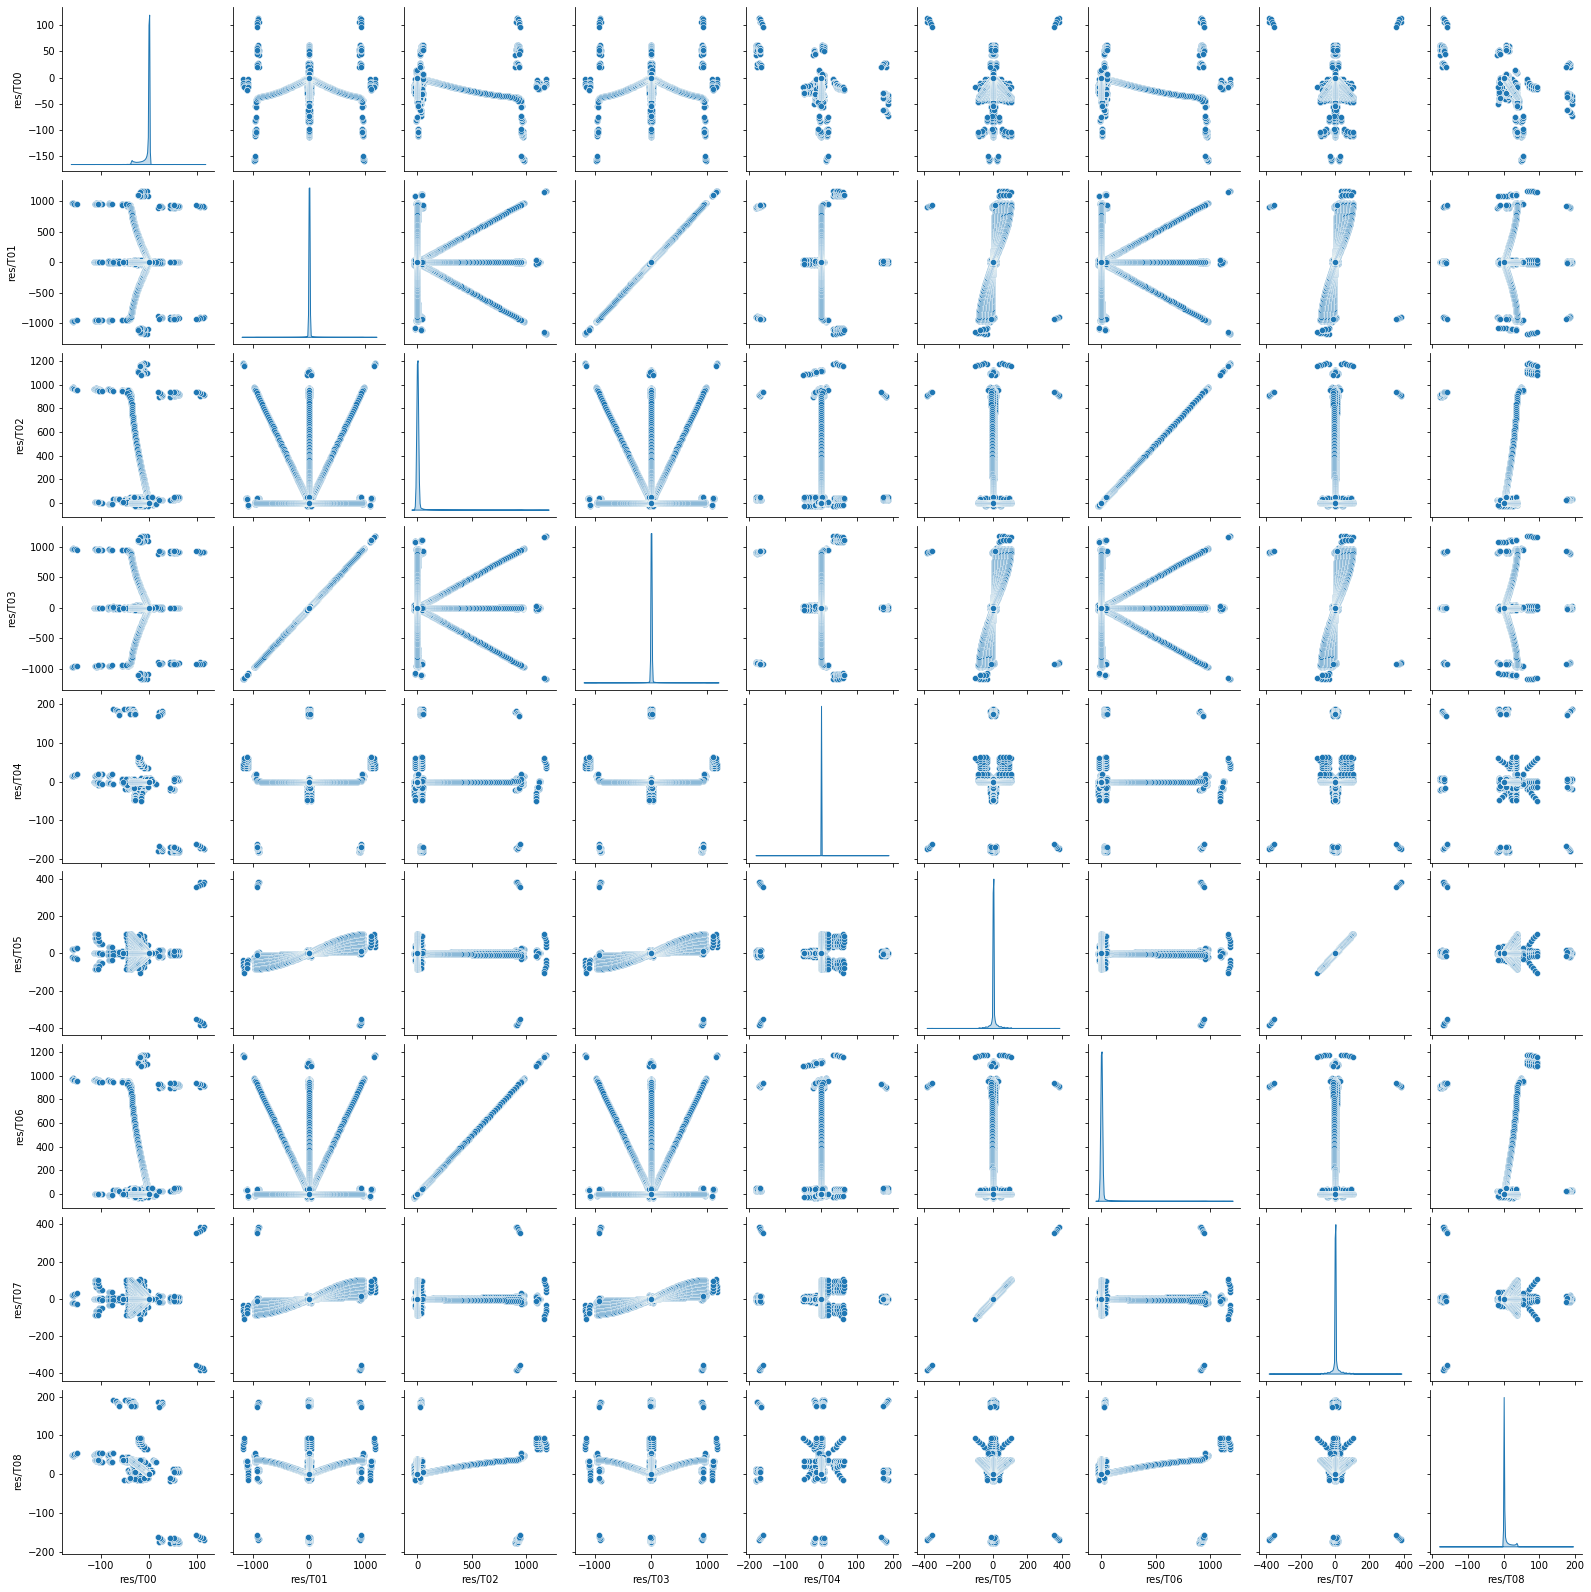

In [15]:
sns.pairplot(trainData[['res/T00', 'res/T01', 'res/T02', 'res/T03', 'res/T04',\
                        'res/T05', 'res/T06', 'res/T07', 'res/T08']], diag_kind='kde')

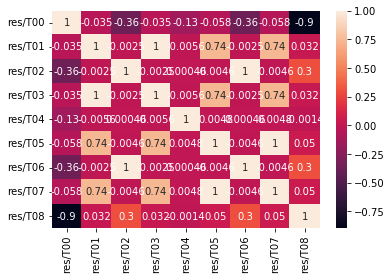

In [16]:
sns.heatmap(trainData[['res/T00', 'res/T01', 'res/T02', 'res/T03', 'res/T04',\
                        'res/T05', 'res/T06', 'res/T07', 'res/T08']].corr(), annot = True)

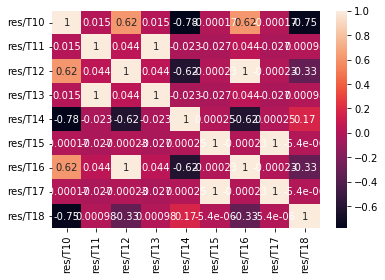

In [17]:
sns.heatmap(trainData[['res/T10', 'res/T11', 'res/T12', 'res/T13', 'res/T14',\
                        'res/T15', 'res/T16', 'res/T17', 'res/T18']].corr(), annot = True)

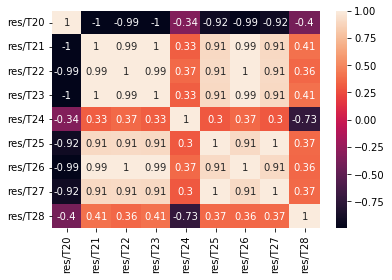

In [18]:
sns.heatmap(trainData[['res/T20', 'res/T21', 'res/T22', 'res/T23', 'res/T24',\
                        'res/T25', 'res/T26', 'res/T27', 'res/T28']].corr(), annot = True)

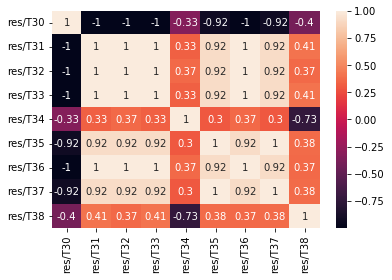

In [19]:
sns.heatmap(trainData[['res/T30', 'res/T31', 'res/T32', 'res/T33', 'res/T34',\
                        'res/T35', 'res/T36', 'res/T37', 'res/T38']].corr(), annot = True)

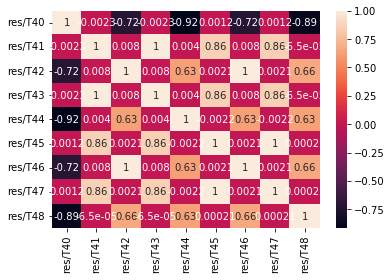

In [20]:
sns.heatmap(trainData[['res/T40', 'res/T41', 'res/T42', 'res/T43', 'res/T44',\
                        'res/T45', 'res/T46', 'res/T47', 'res/T48']].corr(), annot = True)

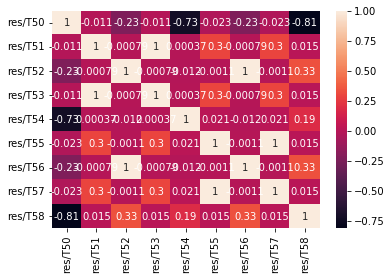

In [21]:
sns.heatmap(trainData[['res/T50', 'res/T51', 'res/T52', 'res/T53', 'res/T54',\
                        'res/T55', 'res/T56', 'res/T57', 'res/T58']].corr(), annot = True)

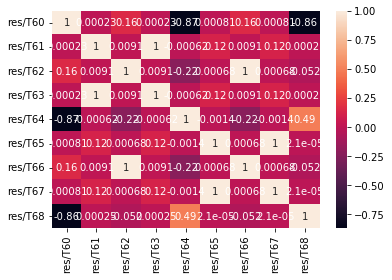

In [22]:
sns.heatmap(trainData[['res/T60', 'res/T61', 'res/T62', 'res/T63', 'res/T64',\
                        'res/T65', 'res/T66', 'res/T67', 'res/T68']].corr(), annot = True)

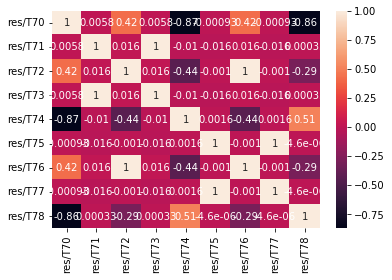

In [23]:
sns.heatmap(trainData[['res/T70', 'res/T71', 'res/T72', 'res/T73', 'res/T74',\
                        'res/T75', 'res/T76', 'res/T77', 'res/T78']].corr(), annot = True)

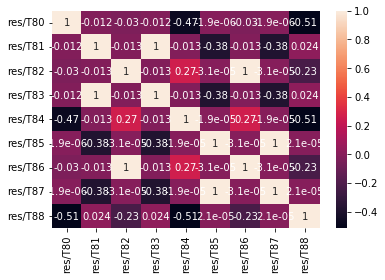

In [24]:
sns.heatmap(trainData[['res/T80', 'res/T81', 'res/T82', 'res/T83', 'res/T84',\
                        'res/T85', 'res/T86', 'res/T87', 'res/T88']].corr(), annot = True)

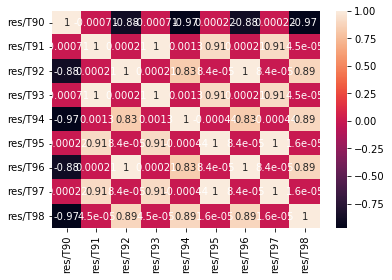

In [25]:
sns.heatmap(trainData[['res/T90', 'res/T91', 'res/T92', 'res/T93', 'res/T94',\
                        'res/T95', 'res/T96', 'res/T97', 'res/T98']].corr(), annot = True)

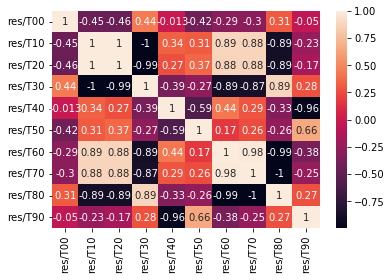

In [26]:
sns.heatmap(trainData[['res/T00', 'res/T10', 'res/T20', 'res/T30', 'res/T40', 'res/T50',\
                        'res/T60', 'res/T70', 'res/T80', 'res/T90']].corr(), annot = True)

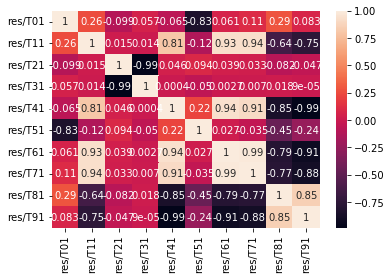

In [27]:
sns.heatmap(trainData[['res/T01', 'res/T11', 'res/T21', 'res/T31', 'res/T41', 'res/T51',\
                        'res/T61', 'res/T71', 'res/T81', 'res/T91']].corr(), annot = True)

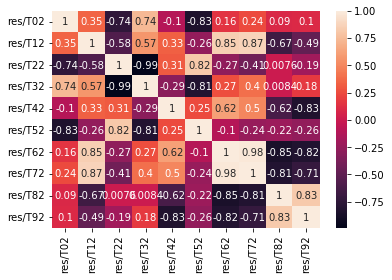

In [28]:
sns.heatmap(trainData[['res/T02', 'res/T12', 'res/T22', 'res/T32', 'res/T42', 'res/T52',\
                        'res/T62', 'res/T72', 'res/T82', 'res/T92']].corr(), annot = True)

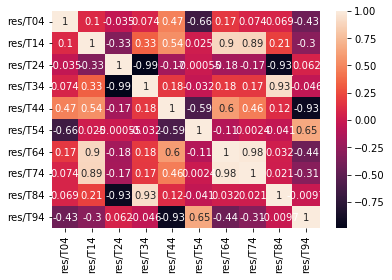

In [29]:
sns.heatmap(trainData[['res/T04', 'res/T14', 'res/T24', 'res/T34', 'res/T44', 'res/T54',\
                        'res/T64', 'res/T74', 'res/T84', 'res/T94']].corr(), annot = True)

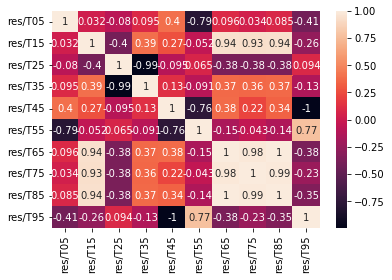

In [30]:
sns.heatmap(trainData[['res/T05', 'res/T15', 'res/T25', 'res/T35', 'res/T45', 'res/T55',\
                        'res/T65', 'res/T75', 'res/T85', 'res/T95']].corr(), annot = True)

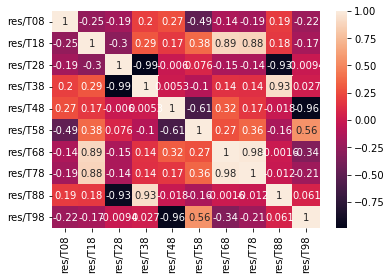

In [31]:
sns.heatmap(trainData[['res/T08', 'res/T18', 'res/T28', 'res/T38', 'res/T48', 'res/T58',\
                        'res/T68', 'res/T78', 'res/T88', 'res/T98']].corr(), annot = True)

In [32]:
trainData['log_res/T00'] = nplog10pm(trainData['res/T00'])
trainData['log_res/T01'] = nplog10pm(trainData['res/T01'])
trainData['log_res/T02'] = nplog10pm(trainData['res/T02'])
trainData['log_res/T03'] = nplog10pm(trainData['res/T03'])
trainData['log_res/T04'] = nplog10pm(trainData['res/T04'])
trainData['log_res/T05'] = nplog10pm(trainData['res/T05'])
trainData['log_res/T06'] = nplog10pm(trainData['res/T06'])
trainData['log_res/T07'] = nplog10pm(trainData['res/T07'])
trainData['log_res/T08'] = nplog10pm(trainData['res/T08'])

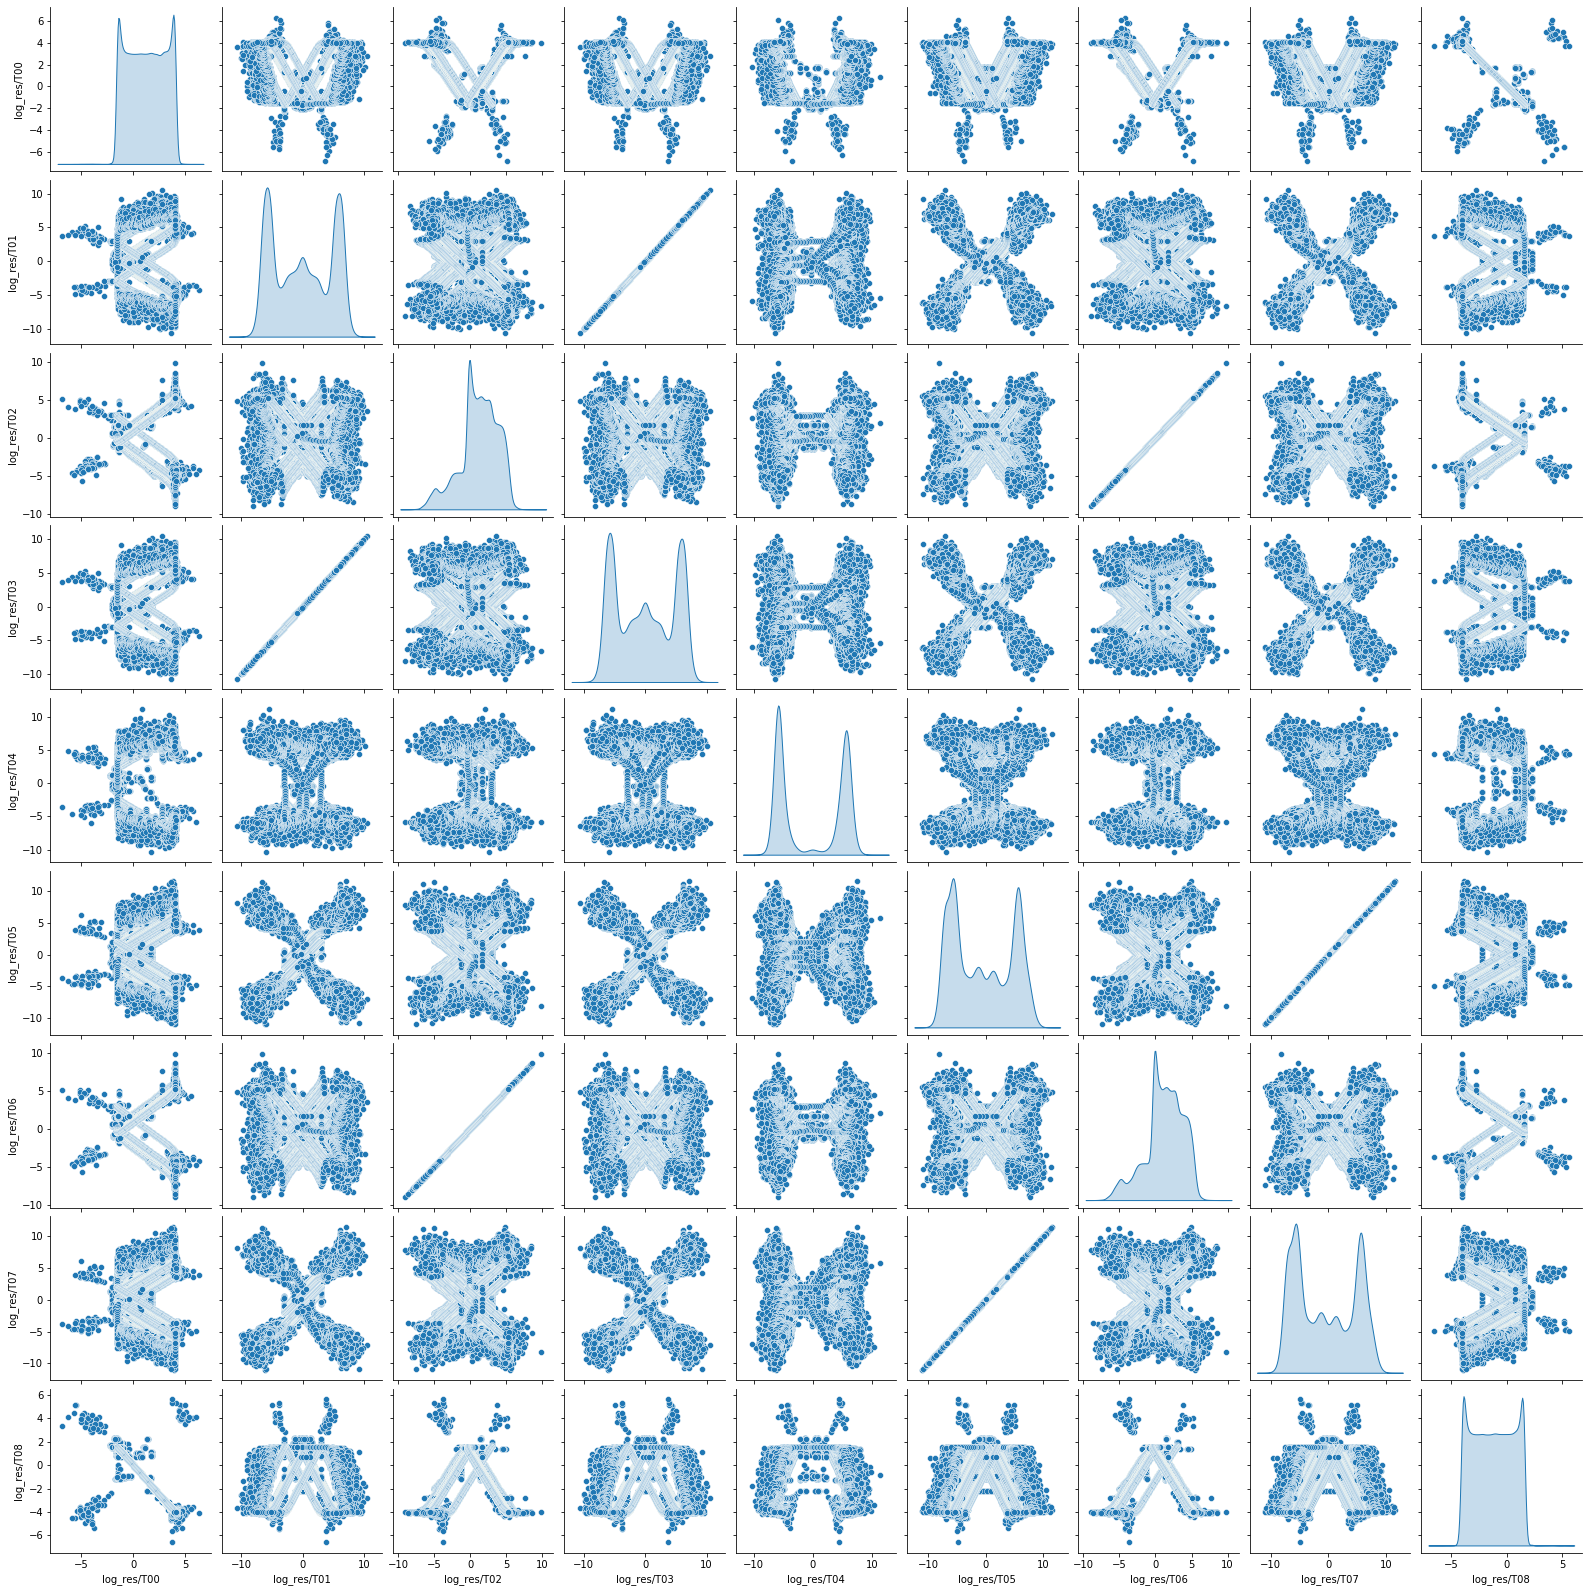

In [33]:
sns.pairplot(trainData[['log_res/T00', 'log_res/T01', 'log_res/T02', 'log_res/T03', 'log_res/T04',\
                        'log_res/T05', 'log_res/T06', 'log_res/T07', 'log_res/T08']], diag_kind='kde')

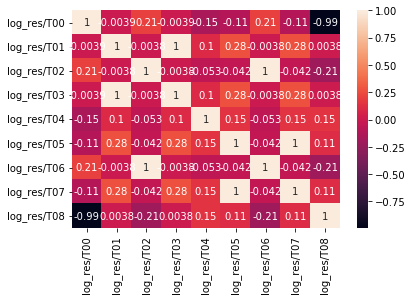

In [34]:
sns.heatmap(trainData[['log_res/T00', 'log_res/T01', 'log_res/T02', 'log_res/T03', 'log_res/T04',\
                        'log_res/T05', 'log_res/T06', 'log_res/T07', 'log_res/T08']].corr(), annot = True)

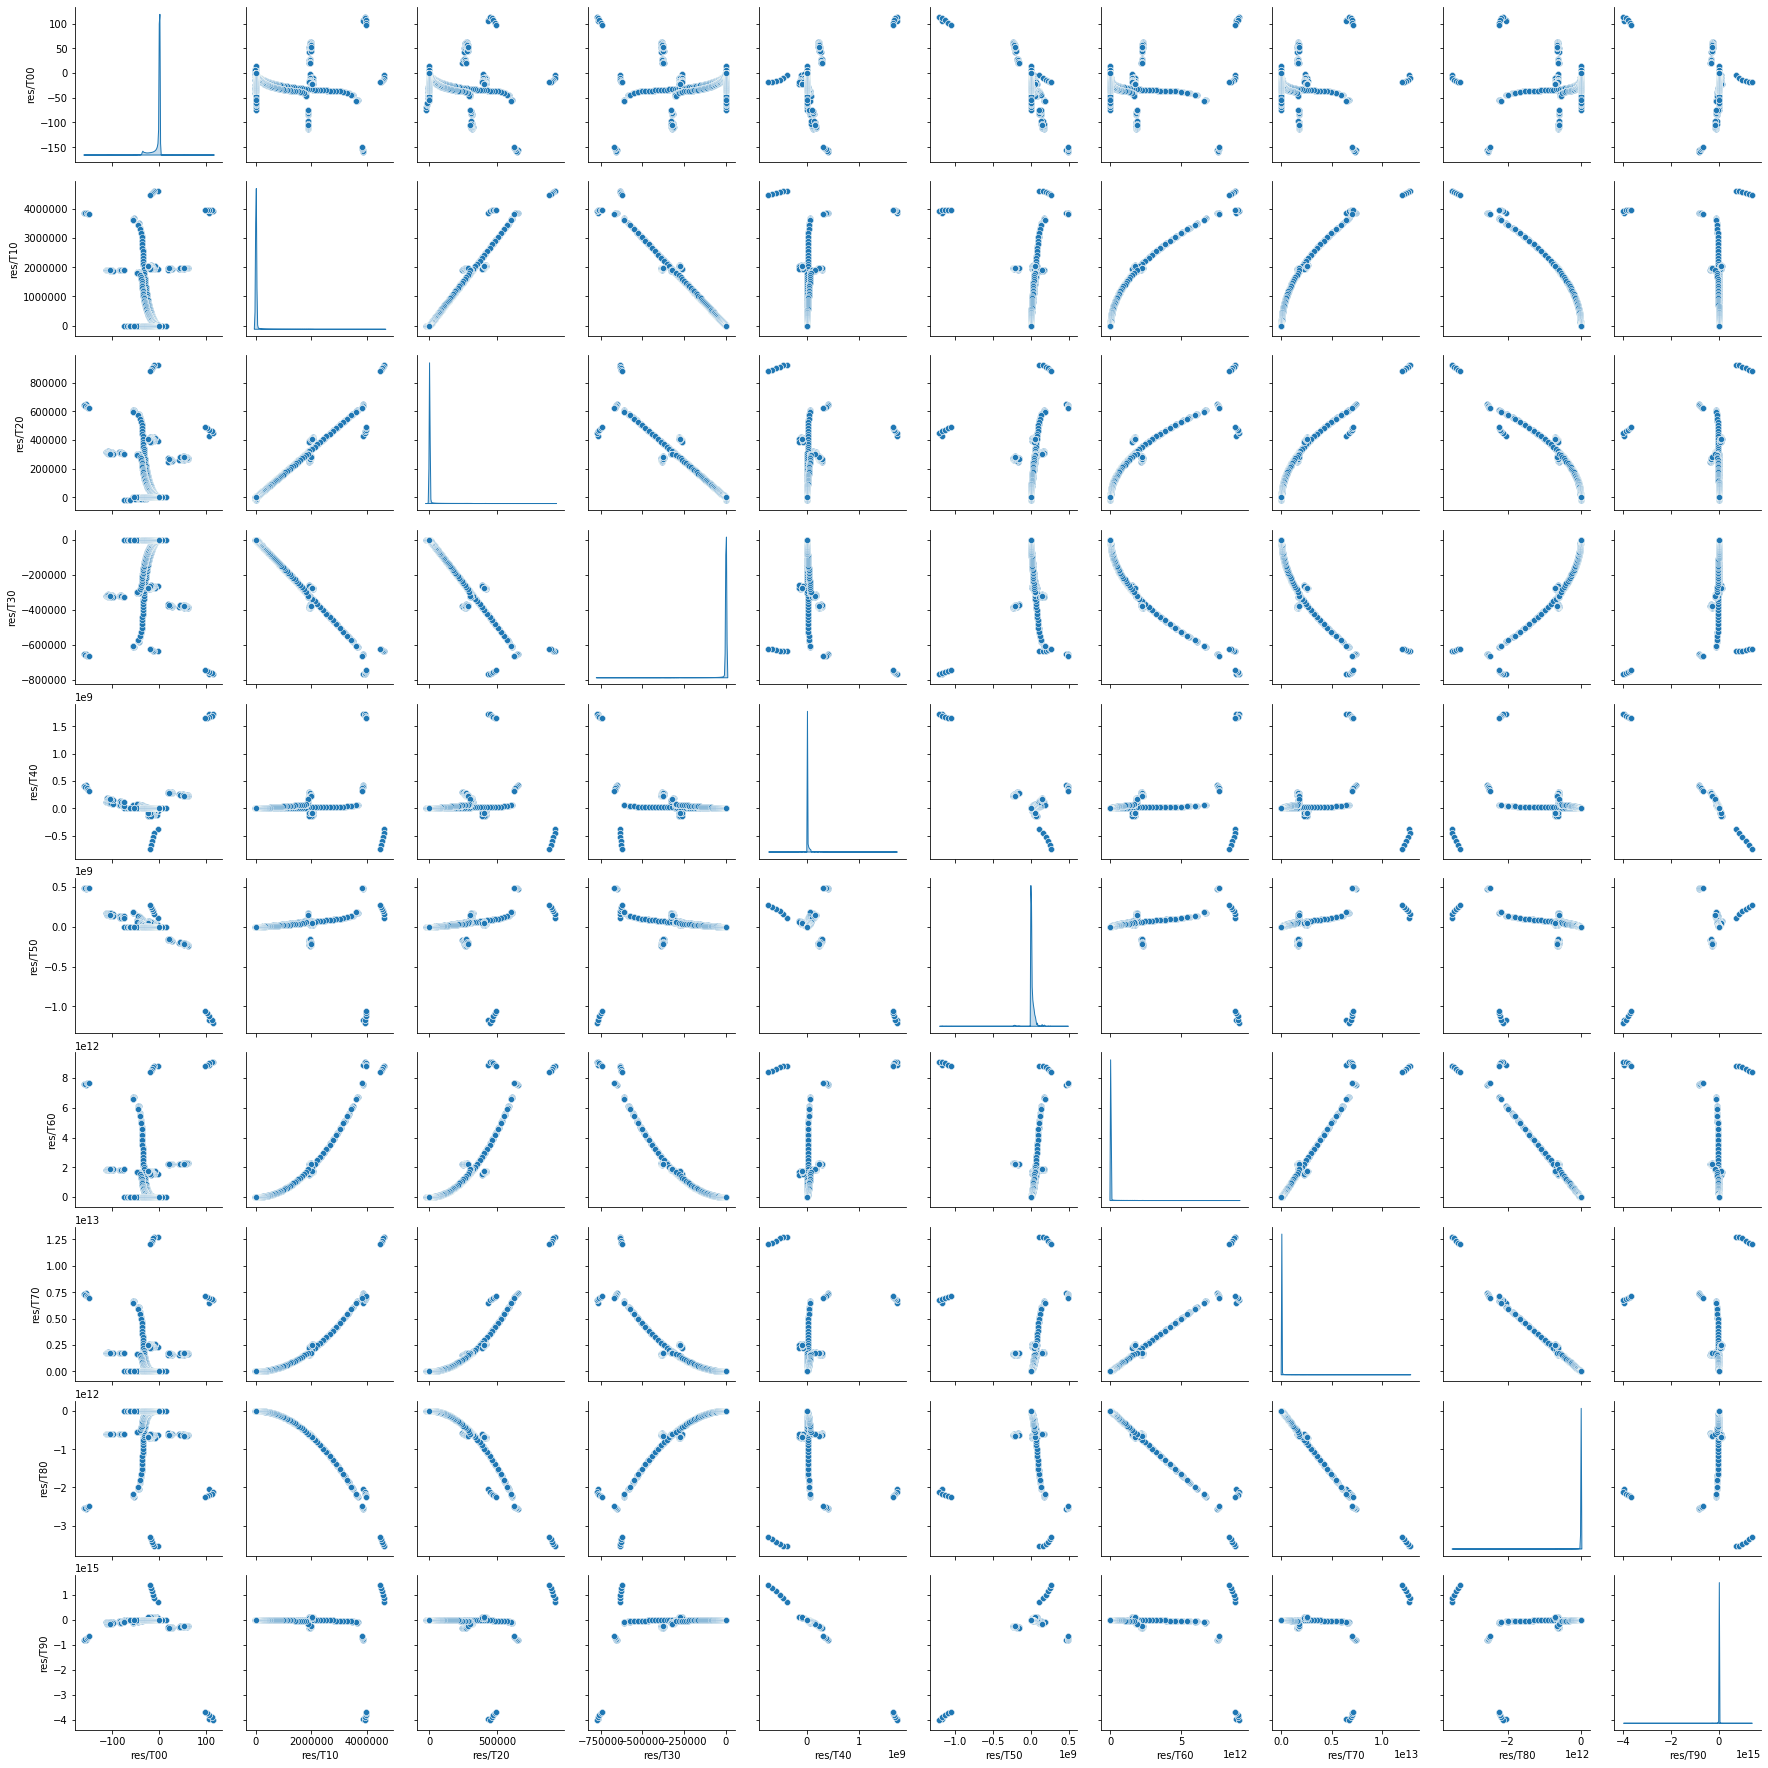

In [35]:
sns.pairplot(trainData[['res/T00', 'res/T10', 'res/T20', 'res/T30', 'res/T40', 'res/T50',\
                        'res/T60', 'res/T70', 'res/T80', 'res/T90']], diag_kind='kde')

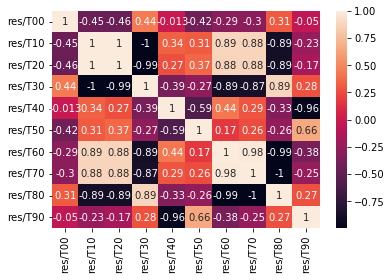

In [36]:
sns.heatmap(trainData[['res/T00', 'res/T10', 'res/T20', 'res/T30', 'res/T40', 'res/T50',\
                        'res/T60', 'res/T70', 'res/T80', 'res/T90']].corr(), annot = True)

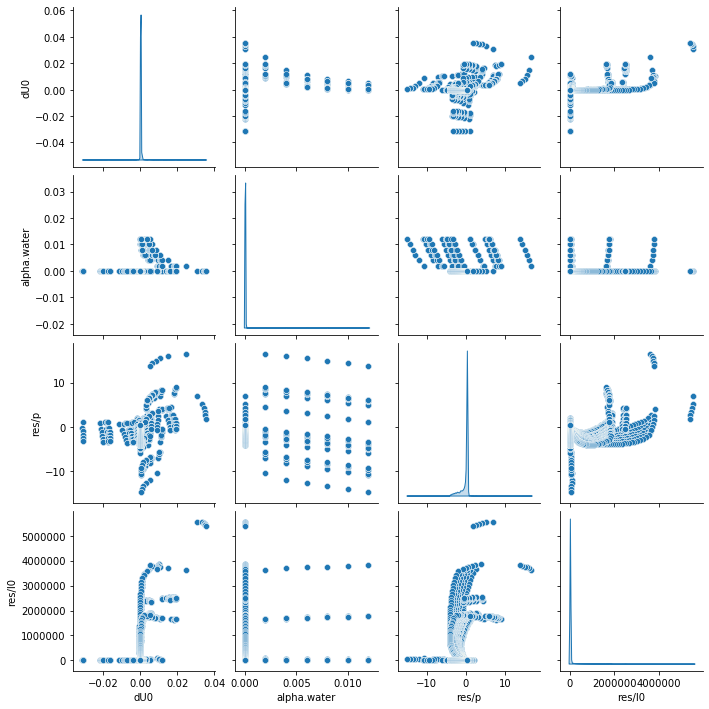

In [37]:
sns.pairplot(trainData[['dU0', 'alpha.water', 'res/p', 'res/I0']], diag_kind='kde')

In [38]:
#testData = formDataset(testTSL, folder, FsScalars, FsVectors, FsTensors, size)

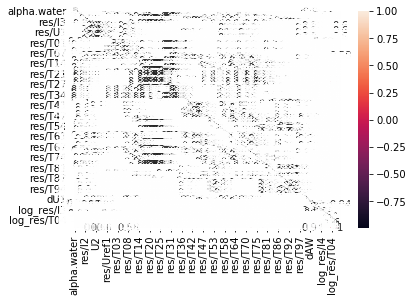

In [39]:
sns.heatmap(trainData.corr(), annot = True)

In [67]:
dU0TargetCorr = trainData.corr()['dU0']
dU0TargetCorr[dU0TargetCorr.abs()>0.3]

res/I0     0.374439
res/I1    -0.336295
res/I4    -0.445515
res/T10    0.351870
res/T20    0.367657
res/T21   -0.373058
res/T22   -0.375441
res/T23   -0.373058
res/T25   -0.342735
res/T26   -0.375441
res/T27   -0.342735
res/T30   -0.336950
res/T31    0.336243
res/T32    0.338782
res/T33    0.336243
res/T35    0.309580
res/T36    0.338782
res/T37    0.309580
res/T42   -0.373846
res/T46   -0.373846
res/T52   -0.325718
res/T56   -0.325718
res/T60    0.422640
res/T64   -0.373125
res/T68   -0.356329
res/T70    0.468475
res/T74   -0.414131
res/T78   -0.398452
res/T80   -0.442056
dU0        1.000000
Name: dU0, dtype: float64

In [68]:
dU1TargetCorr = trainData.corr()['dU1']
dU1TargetCorr[dU1TargetCorr.abs()>0.3]

U1           0.864956
res/U1       0.986202
res/Uref1    0.876432
res/T11      0.762389
res/T13      0.762389
res/T41      0.559265
res/T43      0.559265
res/T45      0.356269
res/T47      0.356269
res/T55     -0.321401
res/T57     -0.321401
res/T61      0.659805
res/T63      0.659805
res/T71      0.635017
res/T73      0.635017
res/T81     -0.588090
res/T83     -0.588090
res/T91     -0.477402
res/T93     -0.477402
res/T95     -0.373062
res/T97     -0.373062
dU1          1.000000
Name: dU1, dtype: float64

In [69]:
dU2TargetCorr = trainData.corr()['dU2']
dU2TargetCorr[dU2TargetCorr.abs()>0.3]

alpha.water       -0.441785
res/alpha.water   -0.467070
res/I2             0.528308
res/I3            -0.570844
res/T08            0.389581
res/T12            0.471514
res/T16            0.471514
res/T40           -0.553290
res/T42            0.476184
res/T46            0.476184
res/T48            0.729745
res/T50            0.550197
res/T58           -0.687109
res/T62            0.582178
res/T66            0.582178
res/T68            0.319182
res/T72            0.513447
res/T76            0.513447
res/T82           -0.572635
res/T86           -0.572635
res/T90            0.502484
res/T92           -0.489506
res/T94           -0.373194
res/T96           -0.489506
res/T98           -0.608067
dU2                1.000000
dAW               -0.527537
Name: dU2, dtype: float64

In [70]:
dAWTargetCorr = trainData.corr()['dAW']
dAWTargetCorr[dAWTargetCorr.abs()>0.3]

alpha.water        0.898536
res/alpha.water    0.934809
res/I2            -0.321166
res/I3             0.361604
res/T40            0.348006
res/T42           -0.348848
res/T44           -0.308114
res/T46           -0.348848
res/T48           -0.322221
res/T50           -0.341304
res/T54            0.313059
dU2               -0.527537
dAW                1.000000
Name: dAW, dtype: float64